# COVID-19 Dashboard

Data Exploring Notebook

## Import Libraries/Functions

In [2]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets

## Import Data

In [3]:
# Live COVID-19 Data by John Hopkins University, Center for Systems Science and Engineering
covid_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
covid_df = covid_df.rename(columns={
    'Country_Region': 'Country',
    'Long_': 'Long'
})
display(covid_df)

,Country,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-03-22 15:26:49,33.939110,67.709953,56153.0,2464.0,49743.0,3946.0,144.247092,NaN,NaN,4.388011,4,AFG
1,Albania,2021-03-22 15:26:49,41.153300,20.168300,121200.0,2137.0,85147.0,33916.0,4211.550490,NaN,NaN,1.763201,8,ALB
2,Algeria,2021-03-22 15:26:49,28.033900,1.659600,116157.0,3057.0,80659.0,32441.0,264.889937,NaN,NaN,2.631783,12,DZA
3,Andorra,2021-03-22 15:26:49,42.506300,1.521800,11517.0,113.0,10973.0,431.0,14905.843526,NaN,NaN,0.981158,20,AND
4,Angola,2021-03-22 15:26:49,-11.202700,17.873900,21733.0,527.0,20073.0,1133.0,66.125549,NaN,NaN,2.424884,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,2021-03-22 15:26:49,14.058324,108.277199,2575.0,35.0,2233.0,307.0,2.645405,NaN,NaN,1.359223,704,VNM
188,West Bank and Gaza,2021-03-22 15:26:49,31.952200,35.233200,225976.0,2458.0,199965.0,23553.0,4429.672075,NaN,NaN,1.087726,275,PSE
189,Yemen,2021-03-22 15:26:49,15.552727,48.516388,3418.0,751.0,1534.0,1133.0,11.459812,NaN,NaN,21.971913,887,YEM
190,Zambia,2021-03-22 15:26:49,-13.133897,27.849332,86535.0,1182.0,83319.0,2034.0,470.709351,NaN,NaN,1.365921,894,ZMB


## Feature Description
- Country : Country Namesb  bbnbnbnbnbn
- Last Update : MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
- Lat and Long : Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
- Confirmed : Counts include confirmed and probable (where reported).
- Deaths : Counts include confirmed and probable (where reported).
- Recovered : Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
- Incident_Rate : Incidence Rate = cases per 100,000 persons.
- Case_Fatality_Ratio (%) : Case-Fatality Ratio (%) = Number recorded deaths / Number cases.

In [4]:
covid_df = covid_df.drop(columns=['People_Tested', 'People_Hospitalized'])
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         192 non-null    object 
 1   Last_Update     192 non-null    object 
 2   Lat             190 non-null    float64
 3   Long            190 non-null    float64
 4   Confirmed       192 non-null    float64
 5   Deaths          192 non-null    float64
 6   Recovered       188 non-null    float64
 7   Active          191 non-null    float64
 8   Incident_Rate   190 non-null    float64
 9   Mortality_Rate  192 non-null    float64
 10  UID             192 non-null    int64  
 11  ISO3            190 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 18.1+ KB


## Data Visualisation

In [7]:
sidebar='Confirmed'

bubble_map = px.scatter_geo(covid_df[['Lat', 'Long', 'Country', sidebar]].dropna(),
    lat='Lat',
    lon='Long',
    hover_name='Country', 
    size=sidebar, 
    projection='robinson',
    color=sidebar,
    size_max=50,
    color_continuous_scale = ['deepskyblue','red']
)
bubble_map.update_geos(
    resolution=110,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue"
)
bubble_map.update_layout(
    height=350, 
    margin={"r":15,"t":15,"l":15,"b":15}, 
    paper_bgcolor='white'
)

bubble_map.show()

In [31]:
threshold = 10
bar = px.bar(covid_df[['Country', sidebar]].dropna().sort_values(sidebar, ascending=False)[:threshold], 
    y=sidebar,
    x='Country', 
    color=sidebar,
    color_continuous_scale=px.colors.sequential.Viridis
)
bar.update_layout(
    height=400, 
    margin={"r":15,"t":15,"l":15,"b":15},
    paper_bgcolor='white'
)
bar.show()

<AxesSubplot:xlabel='Country'>

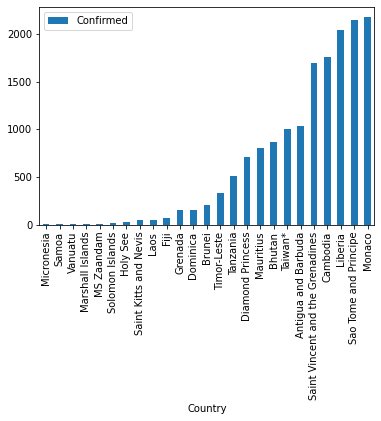

In [33]:
covid_df[['Confirmed', 'Country']].sort_values(by='Confirmed')[:25].plot.bar(x='Country', y='Confirmed')